In [2]:
# Import all needed libraries and sublibraries

import tensorflow as tf

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import keras

import numpy as np

from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras import regularizers

import pandas as pd

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
# Import input (x) and output (y) data, and asign these to df1 and df2

df1 = pd.read_csv('X_data.csv')

df2 = pd.read_csv('Y_data.csv')

In [4]:
# Scale input data

df1 = preprocessing.scale(df1)

In [5]:
# here, I Split the data into input (x) training and testing data, and ouput (y) training and testing data, 
# with training data being 80% of the data, and testing data being the remaining 20% of the data

X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2)

In [7]:
# I Define a "shallow" logistic regression model

model = Sequential()
model.add(Dense(13,input_shape=(30,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [10]:
# I Pass several parameters to 'EarlyStopping' function and assign it to 'earlystopper'

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

# Fit model over 2000 iterations with 'earlystopper' callback, and assign it to history

history = model.fit(X_train, y_train, epochs = 2000, validation_split = 0.15, verbose = 0, 
                    callbacks = [earlystopper])

history_dict=history.history

Epoch 00044: early stopping


Text(0.5, 0, 'Epochs')

<Figure size 432x288 with 0 Axes>

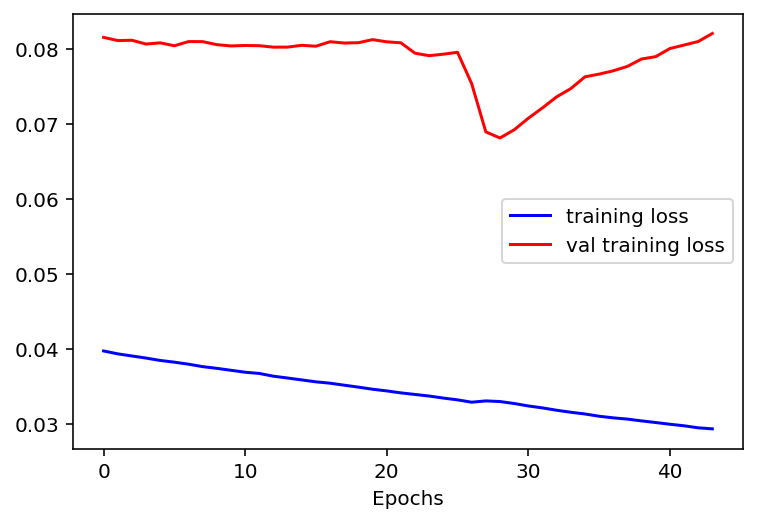

In [11]:
# Then I Plot a training loss and validation split loss over the epochs graph

loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
plt.figure()
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

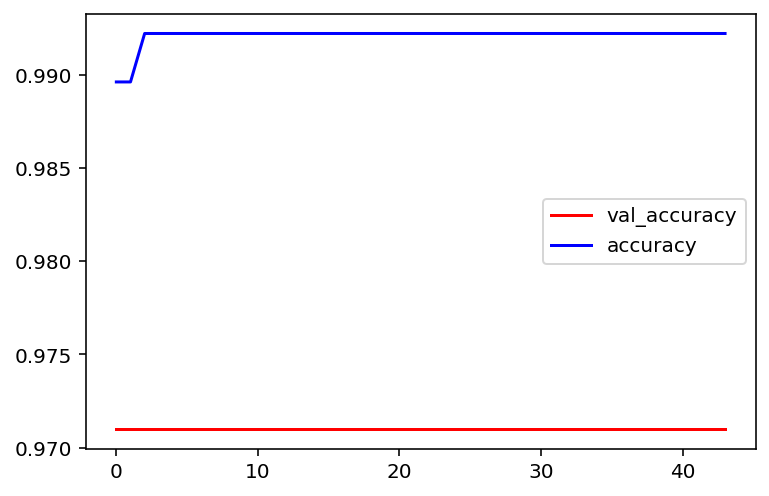

In [12]:
# accuracy over the epochs graph

accuracy_values = history_dict['accuracy']
val_accuracy_values=history_dict['val_accuracy']
plt.plot(val_accuracy_values,'-r',label='val_accuracy')
plt.plot(accuracy_values,'-b', label='accuracy')
plt.legend()

In [13]:
# Calculate loss and accuracy of testing data
loss, acc = model.evaluate(X_test, y_test)
print("Test loss: ", loss)
print("Test accuracy: ", acc)

114/114 [==============================] - 0s 88us/step
Test loss:  0.11376216171080605
Test accuracy:  0.9561403393745422


In [14]:
# AUC score of testing data

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_test_pred = model.predict_proba(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test,y_test_pred)
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)

Testing data AUC:  0.9934375


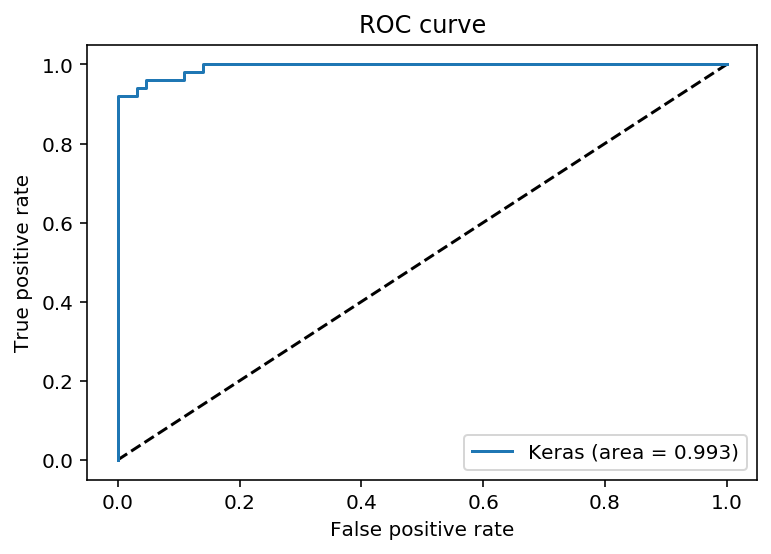

In [15]:
# ROC curve of testing data

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [16]:
# AUC score of training data
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_train_pred = model.predict_proba(X_train)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train,y_train_pred)
auc_keras = auc(fpr_keras, tpr_keras)
print('Training data AUC: ', auc_keras)

Training data AUC:  0.9990884616199945


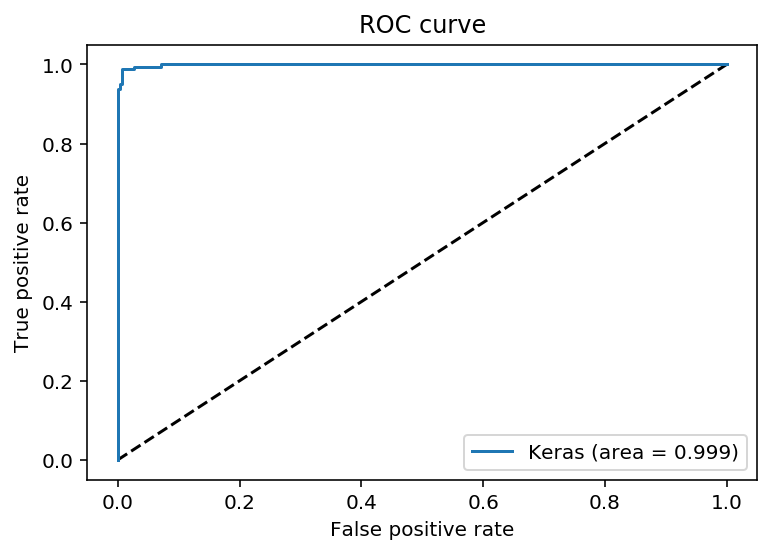

In [17]:
# ROC curve of training data
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()